batman 0


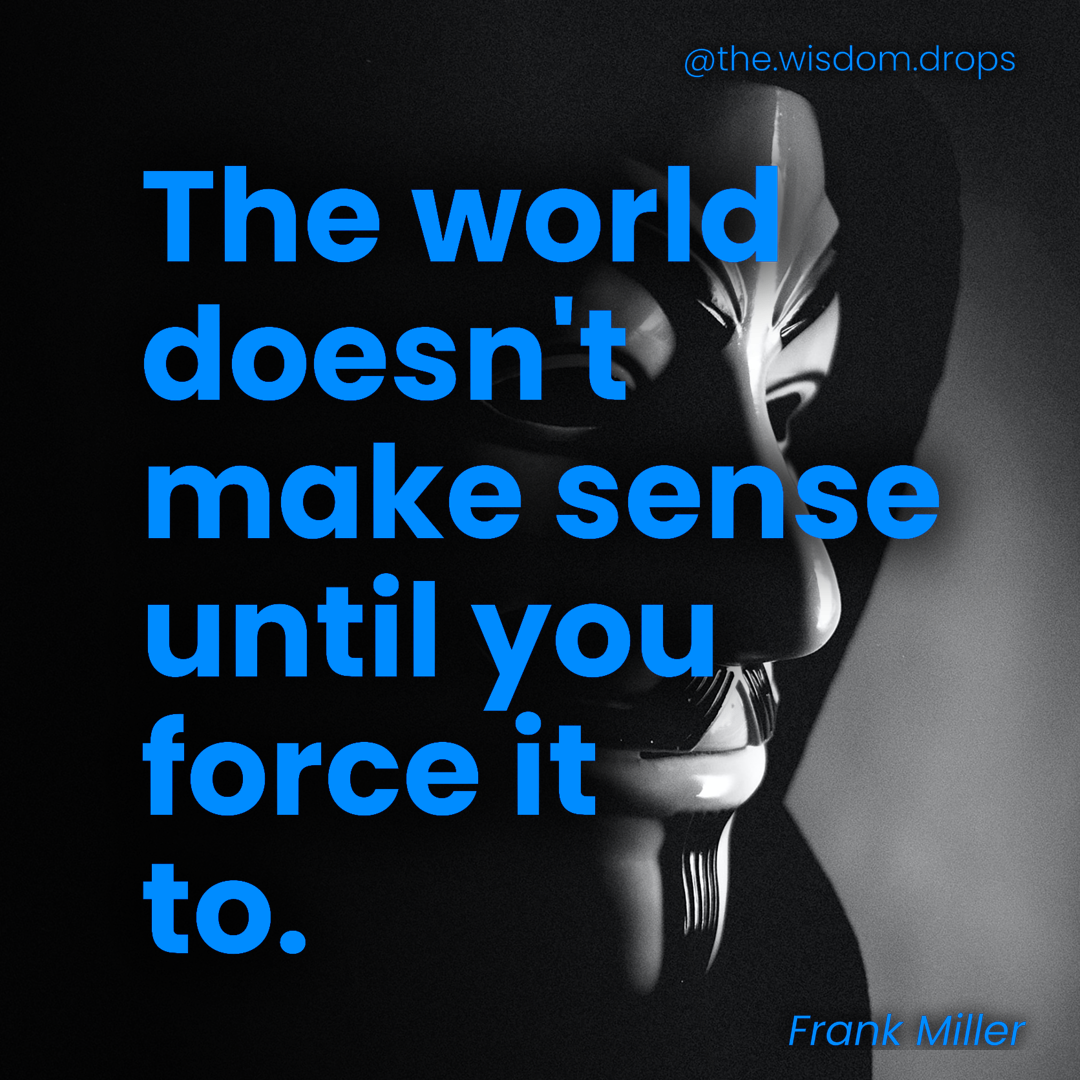

In [4]:
import requests
from PIL import Image
from quote import quote
from src.image.crop import crop
from src.image.draw import resize_img
from src.image.merge import compose_creative
from src.text.manipulate import break_text
from src.image.extract import ApiImgExtractor
from src.paths import LOCAL_PROCESSED_DATA_PATH

themes = [ 'apocalipse'
         ]
format_ = "PNG"
max_words = 16
n = 1 # amount of quotes per theme
for t in themes:
    api = ApiImgExtractor('unsplash')
    quotes = quote(t, limit=n)
    api.query(_search_params={
        'q': t,
        'imgType': 'photos'
    })
    if not quotes:
        continue
    for i, (q, img_url) in enumerate(zip(quotes, api.img_urls)):
        print(t, i)
        if not q or not img_url:
            break
        filepath = LOCAL_PROCESSED_DATA_PATH / f"{t}_{i}.{format_}"
        img = crop(img_url, export=False, output_size=(1080,1080))
        txt = q['quote']
        
        tb_txt = 'Unknown Author'
        if (q['author'] != '') and (len(q['author'].split(' ')) > 1):
            tb_txt = q['author']
        elif q['book'] != '':
            tb_txt = "Book: " + q['book']
            
        txt = txt.replace('.', '. ').replace('  ', ' ')
        
        txt2draw, caption = break_text(txt=txt, word_count=max_words)

        post = compose_creative(img, txt2draw, bottom_right_txt=tb_txt,
                               top_right_txt="@the.wisdom.drops",
                               txt_aspect_ratio = 'NARROW',
                               txt_brightness=3)
        post.save(filepath, format_, quality=90)
post

In [2]:
from src.image.merge import compose_creative
import requests
from PIL import Image
from quote import quote
from src.image.crop import crop
from src.image.draw import resize_img
from src.image.merge import compose_creative
from src.text.manipulate import break_text
from src.image.extract import ApiImgExtractor
from src.paths import LOCAL_PROCESSED_DATA_PATH

from src.text.extract import generate_hashtags
from pathlib import Path
import random

bath 0


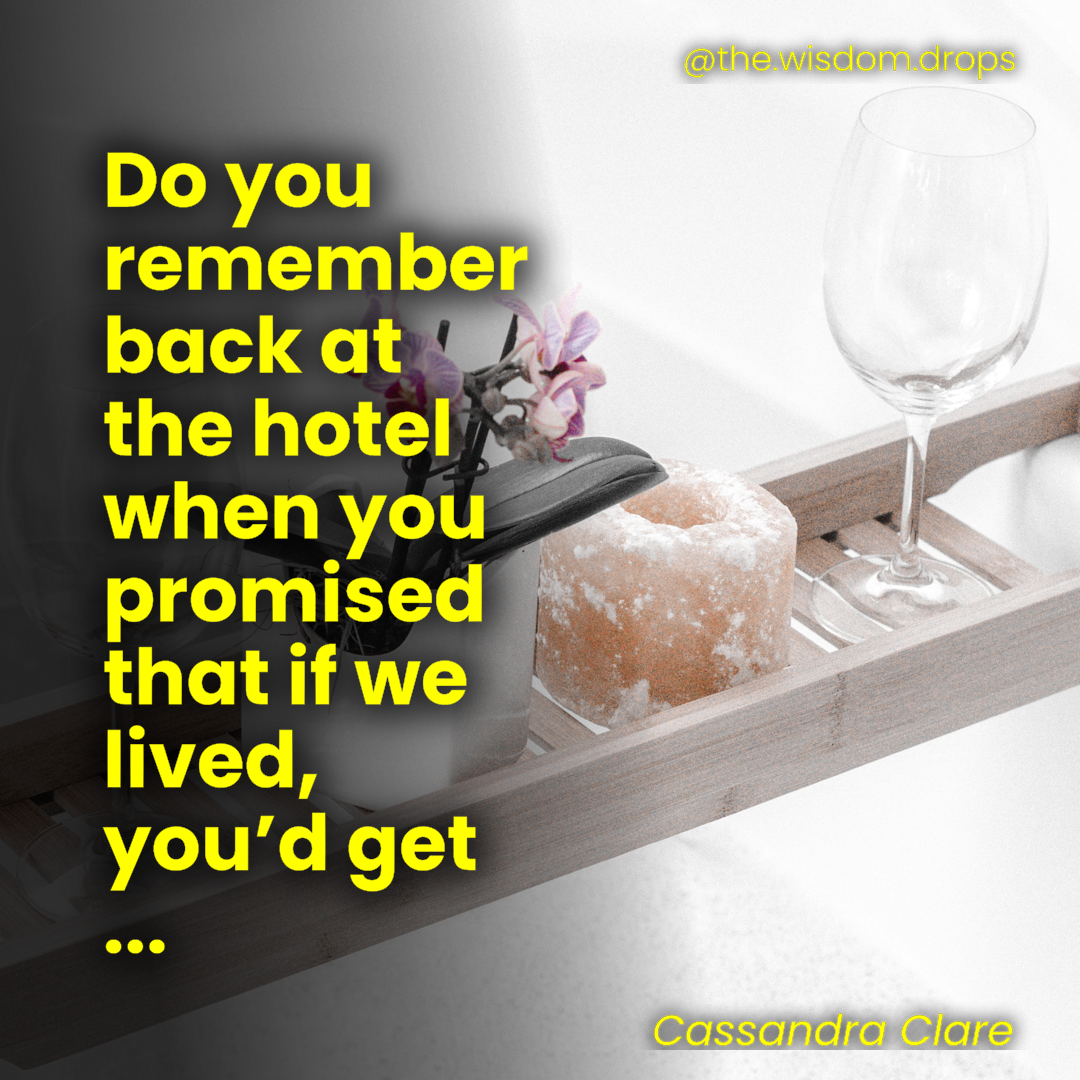

In [3]:
def produce_content():
    pass

def build_post(q:dict, img_url:str, profile_name:str, output_size=(1080,1080), txt_aspect_ratio:str = 'NARROW'):
    
    img = crop(img_url, export=False, output_size=output_size)

    txt = q['quote']
    tb_txt = 'Unknown Author'
    if (q['author'] != '') and (len(q['author'].split(' ')) > 1):
        tb_txt = q['author']
    elif q['book'] != '':
        tb_txt = "Book: " + q['book']

    txt = txt.replace('.', '. ').replace('  ', ' ')

    txt2draw, caption = break_text(txt=txt, word_count=max_words)
    
    ctas = [
        '\n\nDo you get wiser with our content?\n\n👉 Then like, comment and follow us!',
        '\n\nDo you wanna get wiser?\n\nA drop at a time?\n\n👉 Then like, comment and follow us!',
        '\n\nHave you started getting wiser already?\n\n👉 Then like, comment and follow us!',
        '\n\nDo our posts make you think?\n\n👉 Then like, comment and follow us!',
    ]
    caption += random.choice(ctas)

    post = compose_creative(img, txt2draw, bottom_right_txt=tb_txt,
                           top_right_txt=profile_name,
                           txt_aspect_ratio =txt_aspect_ratio,
                           txt_brightness=3)

    return post, caption

    
def export_post(post:Image, filepath:Path):
    post.save(filepath, format_, quality=90)

    
themes = [ 'bath'
         ]
format_ = "PNG"
max_words = 16
n = 1 # amount of quotes per theme
for t in themes:
    api = ApiImgExtractor('unsplash')
    quotes = quote(t, limit=n)
    api.query(_search_params={
        'q': t,
        'imgType': 'photos'
    })
    if not quotes:
        continue
    for i, (q, img_url) in enumerate(zip(quotes, api.img_urls)):
        print(t, i)
        filepath = LOCAL_PROCESSED_DATA_PATH / f"{t}_{i}.{format_}"
        filepath_txt = LOCAL_PROCESSED_DATA_PATH / f"{t}_{i}.txt"
        
        hashtags = generate_hashtags(q['quote'])
        
        if not q or not img_url:
            break
           
        post, caption = build_post(q=q, img_url=img_url, profile_name= "@the.wisdom.drops", txt_aspect_ratio='NARROW', output_size=(1080,1080))
        export_post(post, filepath)
post

In [6]:
caption

'... dressed up in a nurse’s outfit and give me a sponge bath?" asked Jace. "It was Simon who promised you the sponge bath. ""As soon as I’m back on my feet, handsome," said Simon. "I knew we should have left you a rat. \n\nHave you started getting wiser already?\n\n👉 Then like, comment and follow us!'

In [7]:
caption

'... dressed up in a nurse’s outfit and give me a sponge bath?" asked Jace. "It was Simon who promised you the sponge bath. ""As soon as I’m back on my feet, handsome," said Simon. "I knew we should have left you a rat. \n\nHave you started getting wiser already?\n\n👉 Then like, comment and follow us!'

In [40]:
filepath_txt = LOCAL_PROCESSED_DATA_PATH / f"{t}_{i}.txt"


In [42]:
with open(filepath_txt, mode='w', encoding='utf8') as fp:
    fp.write(caption)

In [37]:
caption

'... ser; diante dele, a existência fluía como um sopro, sempre em mutação, tudo muda a todo o instante e nada jamais volta a ser o mesmo. Não há finais felizes, reflectiu de si para si. Todos temos um sétimo selo para quebrar, um destino à nossa espera, um apocalipse no fim da linha. Por mais êxitos que somemos, por mais triunfos que alcancemos, por mais conquistas que façamos, para a última estação está-nos sempre reservada uma derrota. Se tivermos sorte e nos esforçarmos por isso, a vida até pode correr bem e ser uma incrível sucessão de momentos felizes, mas no fim, faça-se o que se fizer, tente-se o que se tentar, diga-se o que se disser, aguarda-nos sempre uma derrota, a mais final e absoluta de todas. . . . \n\nDo you get wiser with our content?\n\n👉 Then like, comment and follow us!'

C:\Users\muril\.virtualenvs\insta-post-generator-N5ODM5nx\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muril\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [5]:
caption

'... dressed up in a nurse’s outfit and give me a sponge bath?" asked Jace. "It was Simon who promised you the sponge bath. ""As soon as I’m back on my feet, handsome," said Simon. "I knew we should have left you a rat. \n\nDo you wanna get wiser?\n\nA drop at a time?\n\n👉 Then like, comment and follow us!'

In [11]:
from nltk import download



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\muril\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

['#👉',
 '#u',
 '#bath',
 '#follow',
 '#drop',
 '#simon',
 '#get',
 '#wanna',
 '#comment',
 '#like',
 '#outfit',
 '#sponge',
 '#time',
 '#i',
 '#wiser']